Pada bagian ini, beberapa pustaka Python diimpor
===

1. **pandas** → Membaca, mengolah, dan menganalisis data dalam bentuk tabel (*DataFrame*).
2. **sqlite3** → Mengelola database SQLite — berguna untuk menyimpan atau mengakses data dari basis data lokal.
3. **seaborn** → *Library* visualisasi data berbasis Matplotlib, digunakan untuk membuat grafik yang menarik dan informatif.
4. **matplotlib.pyplot** →	*Library* dasar untuk membuat grafik seperti *line chart, bar chart, scatter plot,* dan lainnya.
5. **tabulate** → Menampilkan data dalam format tabel yang lebih rapi di *output* terminal atau notebook.

In [24]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

Penjelasan kode dibawah
===
Perrtama menentukan lokasi file dataset, kemudian membaca file CSV menggunakan pandas, lalu menampilkan pesan keberhasilan dan lima baris pertama dari dataset untuk memastikan data terbaca dengan benar.

In [17]:
file_path = r"C:\Users\Acer\Documents\Projek Starbuck\Data\starbucks_drinkMenu_expanded.csv"

df = pd.read_csv(file_path)
print("✅ Dataset loaded successfully!")
print(df.head())

✅ Dataset loaded successfully!
         Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0            0.1             0.0                0.0             0   
1            0.1             0.0                0.0             0   
2            0.1             0.0                0.0             0   
3            0.1             0.0                0.0             0   
4            0.1             0.1                0.0             5   

    Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                          5           

In [18]:
print(df.columns)

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')


Kode dibawah adalah proses membersihkah data
===

1. Nama kolom dibersihkan dari spasi dan karakter aneh.

2. Nilai 'varies' diganti dengan 0 agar bisa dikonversi ke angka.

3. Semua nilai kosong (NaN) diisi dengan 0.

4. Kolom numerik diubah ke tipe data angka bila memungkinkan.

5. Hasil akhirnya menampilkan tipe data dari setiap kolom untuk memastikan data sudah bersih dan konsisten.

In [19]:
# Bersihkan nama kolom (hapus spasi dan karakter aneh)
df.columns = (
    df.columns
    .str.strip()
    .str.replace('[^A-Za-z0-9_]+', '_', regex=True)
)
df.columns = df.columns.str.replace('_$', '', regex=True)

# Ganti 'varies' dengan NaN lalu ubah ke angka
if 'Caffeine_mg' in df.columns:
    df['Caffeine_mg'] = df['Caffeine_mg'].replace('varies', None)
    df['Caffeine_mg'] = pd.to_numeric(df['Caffeine_mg'], errors='coerce').fillna(0)
elif 'Caffeine_mg_' in df.columns:
    df['Caffeine_mg_'] = df['Caffeine_mg_'].replace('varies', None)
    df['Caffeine_mg_'] = pd.to_numeric(df['Caffeine_mg_'], errors='coerce').fillna(0)
    df = df.rename(columns={'Caffeine_mg_': 'Caffeine_mg'})

# Ganti NaN di seluruh dataframe
df = df.fillna(0)

# Ubah kolom numerik lain ke angka jika memungkinkan
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='ignore')
    except Exception:
        pass

print("\nData berhasil dibersihkan:")
print(df.dtypes)



Data berhasil dibersihkan:
Beverage_category         object
Beverage                  object
Beverage_prep             object
Calories                   int64
Total_Fat_g               object
Trans_Fat_g              float64
Saturated_Fat_g          float64
Sodium_mg                  int64
Total_Carbohydrates_g      int64
Cholesterol_mg             int64
Dietary_Fibre_g            int64
Sugars_g                   int64
Protein_g                float64
Vitamin_A_DV              object
Vitamin_C_DV              object
Calcium_DV                object
Iron_DV                   object
Caffeine_mg              float64
dtype: object


C:\Users\Acer\AppData\Local\Temp\ipykernel_624\3849689469.py:24: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


Kode dibawah membuat database sql:
===

1. sqlite3.connect("starbucks.db") membuat atau membuka file database SQLite.

2. df.to_sql("menu", conn, if_exists="replace", index=False) menyimpan isi *DataFrame* df ke dalam tabel bernama menu di database tersebut.

3. Parameter if_exists="replace" memastikan tabel lama (jika ada) akan diganti dengan data terbaru.

4. Pesan di akhir memastikan proses penyimpanan berhasil.

In [20]:
# Create SQLite Database 
conn = sqlite3.connect("starbucks.db")
df.to_sql("menu", conn, if_exists="replace", index=False)
print("\nData stored in SQLite database: 'starbucks.db'")



Data stored in SQLite database: 'starbucks.db'


Penjelasan kode dibawah untuk membuat daftar minuman dengan kafein tertinggi berdasarkan ukuran
===

-Membuat daftar ukuran minuman (*sizes*) yang akan dianalisis.

-Melakukan perulangan (*loop*) untuk setiap ukuran, lalu menjalankan query SQL:

1. Mengambil kolom Beverage, Beverage_category, dan Caffeine_mg dari tabel menu.

2. Menyaring data berdasarkan kolom Beverage_prep yang sesuai dengan ukuran tertentu.

3. Mengurutkan hasil berdasarkan kadar kafein tertinggi (ORDER BY Caffeine_mg DESC).

4. Mengambil hanya 5 hasil teratas (LIMIT 5).

-Menyimpan hasil *query* ke dalam d*ictionary dataframes* agar setiap ukuran memiliki *DataFrame* sendiri.

-Menampilkan tabel hasil *query* untuk setiap ukuran minuman.

In [21]:
sizes = ['Short', 'Tall', 'Grande', 'Venti']

# Buat dictionary untuk menyimpan dataframe tiap ukuran
dataframes = {}

for size in sizes:
    query = f"""
    SELECT 
        Beverage, 
        Beverage_category, 
        Caffeine_mg
    FROM menu
    WHERE Beverage_prep LIKE '%{size}%'
          AND Caffeine_mg IS NOT NULL
    ORDER BY Caffeine_mg DESC
    LIMIT 5;
    """

    df_size = pd.read_sql_query(query, conn)
    
    # Simpan ke dictionary
    dataframes[size] = df_size
    
    # Tampilkan tabel
    print(f"5 MINUM DENGAN KAFEIN TERTINGGI ({size} Size):")
    display(df_size)


5 MINUM DENGAN KAFEIN TERTINGGI (Short Size):


,Beverage,Beverage_category,Caffeine_mg
0,Brewed Coffee,Coffee,175.0
1,Caffè Mocha (Without Whipped Cream),Classic Espresso Drinks,85.0
2,Caffè Latte,Classic Espresso Drinks,75.0
3,Vanilla Latte (Or Other Flavoured Latte),Classic Espresso Drinks,75.0
4,Caffè Americano,Classic Espresso Drinks,75.0


5 MINUM DENGAN KAFEIN TERTINGGI (Tall Size):


,Beverage,Beverage_category,Caffeine_mg
0,Brewed Coffee,Coffee,260.0
1,Shaken Iced Tazo® Tea (With Classic Syrup),Shaken Iced Beverages,170.0
2,Caffè Americano,Classic Espresso Drinks,150.0
3,Mocha (Without Whipped Cream),Frappuccino® Blended Coffee,130.0
4,Iced Brewed Coffee (With Classic Syrup),Shaken Iced Beverages,120.0


5 MINUM DENGAN KAFEIN TERTINGGI (Grande Size):


,Beverage,Beverage_category,Caffeine_mg
0,Brewed Coffee,Coffee,330.0
1,Caffè Americano,Classic Espresso Drinks,225.0
2,Caffè Mocha (Without Whipped Cream),Classic Espresso Drinks,175.0
3,Iced Brewed Coffee (With Classic Syrup),Shaken Iced Beverages,165.0
4,Caffè Latte,Classic Espresso Drinks,150.0


5 MINUM DENGAN KAFEIN TERTINGGI (Venti Size):


,Beverage,Beverage_category,Caffeine_mg
0,Brewed Coffee,Coffee,410.0
1,Caffè Americano,Classic Espresso Drinks,300.0
2,Iced Brewed Coffee (With Classic Syrup),Shaken Iced Beverages,235.0
3,Caffè Mocha (Without Whipped Cream),Classic Espresso Drinks,180.0
4,Java Chip,Frappuccino® Light Blended Coffee,165.0


Kode dibawah untuk membuat bar chart dari hasil sebelumnya
===

-Menentukan gaya visualisasi menggunakan sns.set() dengan tema whitegrid dan palet warna viridis.

-Membuat 4 plot (2x2 grid) untuk setiap ukuran minuman.

-Pada setiap subplot:

1. Menggunakan barplot dari Seaborn dengan sumbu X = kadar kafein dan Y = nama minuman.

2. Pewarnaan berdasarkan kategori minuman (Beverage_category).

3. Judul dan label diperbarui untuk setiap ukuran.

-Menambahkan legend global di sisi kanan dan judul utama untuk seluruh gambar.

-Mengatur tata letak agar rapi dan proporsional dengan tight_layout().

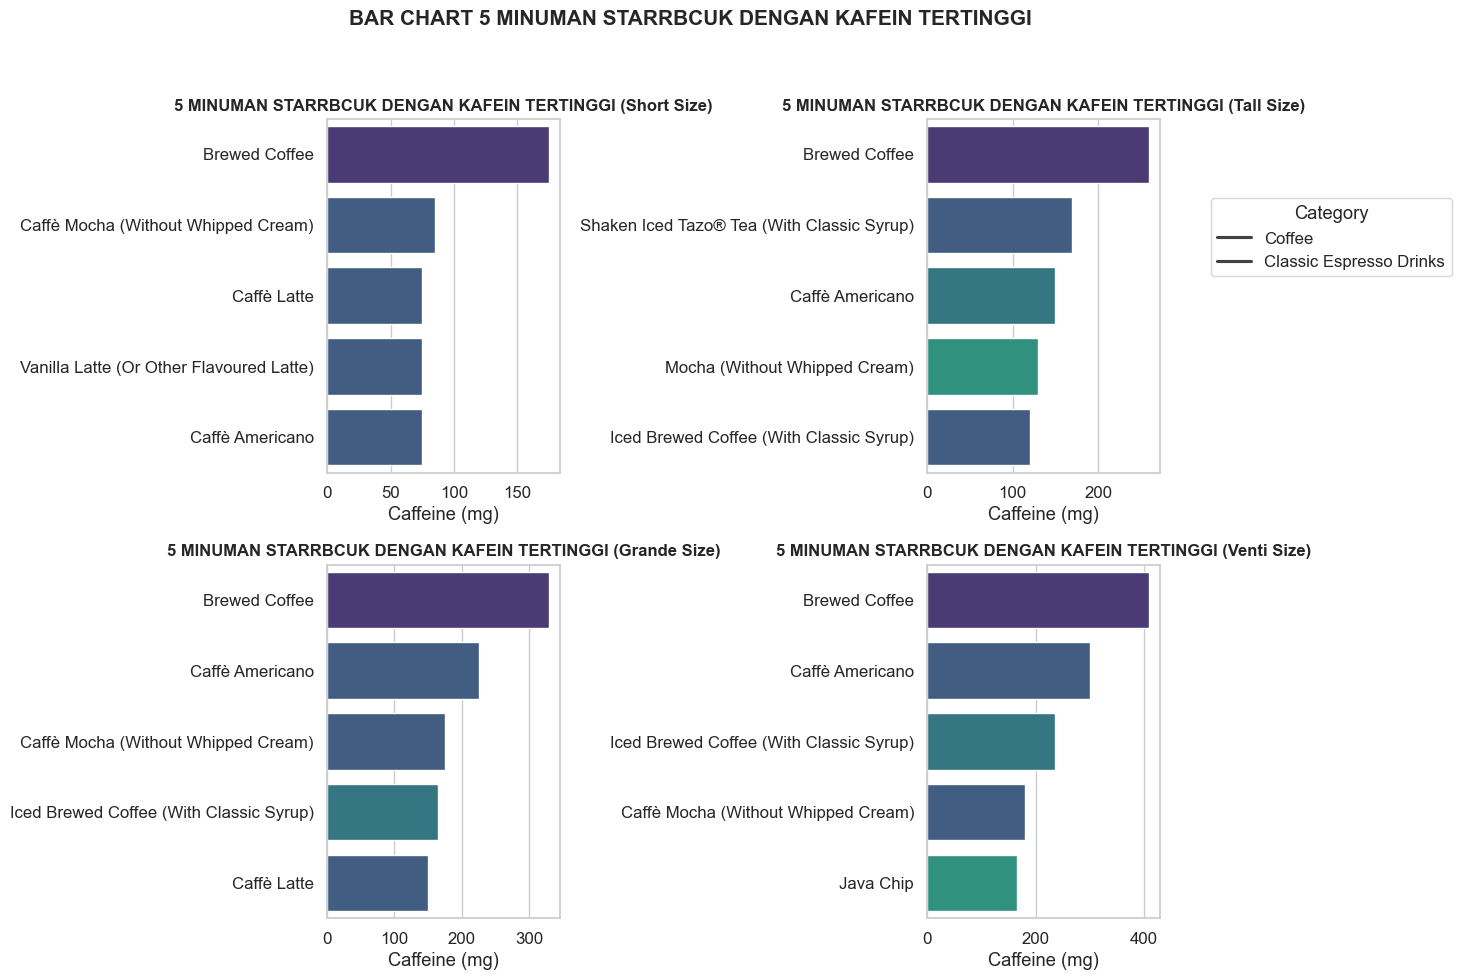

In [40]:
sns.set(style="whitegrid", palette="viridis", font_scale=1.1)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, size in enumerate(dataframes.keys()):
    df_size = dataframes[size]
    
    sns.barplot(
        data=df_size,
        x='Caffeine_mg',
        y='Beverage',
        hue='Beverage_category',
        dodge=False,
        ax=axes[i]
    )
    
    axes[i].set_title(f'5 MINUMAN STARRBCUK DENGAN KAFEIN TERTINGGI ({size} Size)', fontsize=12, weight='bold')
    axes[i].set_xlabel('Caffeine (mg)')
    axes[i].set_ylabel('')
    axes[i].legend().set_visible(False)

fig.legend(
    dataframes['Short']['Beverage_category'].unique(),
    title='Category',
    bbox_to_anchor=(1.05, 0.8)
)
plt.suptitle('BAR CHART 5 MINUMAN STARRBCUK DENGAN KAFEIN TERTINGGI', fontsize=15, weight='bold')
plt.tight_layout(rect=[0, 0, 0.85, 0.95])
plt.show()

Kode dibawah Untuk membuat kategori minuman mana yang memiliki rata-rata kalori tertinggi
===

-Menulis query SQL untuk:

1. Mengelompokkan data berdasarkan Beverage_category.

2. Menghitung rata-rata kalori (AVG(Calories)) dan membulatkannya menjadi dua angka desimal dengan ROUND().

3. Mengurutkan hasil dari kategori dengan rata-rata kalori tertinggi ke terendah.

-Menjalankan query dan menyimpan hasilnya ke DataFrame avg_calories.

-Menampilkan hasil dalam format tabel yang rapi menggunakan fungsi tabulate.

In [25]:
query2 = """
SELECT 
    Beverage_category,
    ROUND(AVG(Calories), 2) AS Avg_Calories
FROM menu
GROUP BY Beverage_category
ORDER BY Avg_Calories DESC;
"""

# Eksekusi query dan simpan ke dataframe
avg_calories = pd.read_sql_query(query2, conn)

# Tampilkan tabel dengan tabulate
print("RATA-RATA KALORI BERDASARKAN TIPE MINUMAN:\n")
print(tabulate(avg_calories, headers='keys', tablefmt='fancy_grid', showindex=False))


RATA-RATA KALORI BERDASARKAN TIPE MINUMAN:

╒═══════════════════════════════════╤════════════════╕
│ Beverage_category                 │   Avg_Calories │
╞═══════════════════════════════════╪════════════════╡
│ Smoothies                         │         282.22 │
├───────────────────────────────────┼────────────────┤
│ Frappuccino® Blended Coffee       │         276.94 │
├───────────────────────────────────┼────────────────┤
│ Signature Espresso Drinks         │         250    │
├───────────────────────────────────┼────────────────┤
│ Frappuccino® Blended Crème        │         233.08 │
├───────────────────────────────────┼────────────────┤
│ Tazo® Tea Drinks                  │         177.31 │
├───────────────────────────────────┼────────────────┤
│ Frappuccino® Light Blended Coffee │         162.5  │
├───────────────────────────────────┼────────────────┤
│ Classic Espresso Drinks           │         140.17 │
├───────────────────────────────────┼────────────────┤
│ Shaken Iced Beverag

Kode dibawah untuk membuat tabel minuman dengan rata-rata kafein tertinggi
===

-Menulis *query* SQL untuk:

1. Mengelompokkan data berdasarkan Beverage_category.

2. Menghitung rata-rata kadar kafein (AVG(Caffeine_mg)) dan membulatkannya menjadi dua angka desimal.

3. Mengabaikan nilai kosong (WHERE Caffeine_mg IS NOT NULL).

4. Mengurutkan hasil berdasarkan kadar kafein tertinggi.

-Menjalankan *query* dan menyimpan hasilnya ke *DataFrame* avg_caffeine.

-Menampilkan hasil dalam format tabel menggunakan tabulate.

In [ ]:
query3 = """
SELECT 
    Beverage_category,
    ROUND(AVG(Caffeine_mg), 2) AS Avg_Caffeine
FROM menu
WHERE Caffeine_mg IS NOT NULL
GROUP BY Beverage_category
ORDER BY Avg_Caffeine DESC;
"""

# Eksekusi query dan simpan ke dataframe
avg_caffeine = pd.read_sql_query(query3, conn)

# Tampilkan tabel dengan tabulate
print("RATA-RATA KAFEIN BERDASARKAN TIPE MINUMAN:\n")
print(tabulate(avg_caffeine, headers='keys', tablefmt='fancy_grid', showindex=False))



RATA-RATA KAFEIN BERDASARKAN TIPE MINUMAN:

╒═══════════════════════════════════╤════════════════╕
│ Beverage_category                 │   Avg_Caffeine │
╞═══════════════════════════════════╪════════════════╡
│ Coffee                            │         293.75 │
├───────────────────────────────────┼────────────────┤
│ Classic Espresso Drinks           │         122.07 │
├───────────────────────────────────┼────────────────┤
│ Frappuccino® Blended Coffee       │         101.81 │
├───────────────────────────────────┼────────────────┤
│ Frappuccino® Light Blended Coffee │          99.58 │
├───────────────────────────────────┼────────────────┤
│ Shaken Iced Beverages             │          93.06 │
├───────────────────────────────────┼────────────────┤
│ Signature Espresso Drinks         │          73.88 │
├───────────────────────────────────┼────────────────┤
│ Tazo® Tea Drinks                  │          34.9  │
├───────────────────────────────────┼────────────────┤
│ Smoothies          

Kode dibawah untuk membuat tabel minuman dengan rata-rata lemak tertinggi.
===

-Menulis *query* SQL untuk:

1. Mengelompokkan data berdasarkan Beverage_category.

2. Menghitung rata-rata Total_Fat_g dan membulatkannya menjadi dua desimal.

3. Mengabaikan nilai kosong atau NULL.

4. Mengurutkan hasil dari kategori dengan rata-rata lemak tertinggi ke terendah.

-Menjalankan *query* dan menyimpan hasilnya ke *DataFrame* avg_fat.

-Menampilkan hasil dalam bentuk tabel yang rapi dengan tabulate.

In [ ]:
query4 = """
SELECT 
    Beverage_category,
    ROUND(AVG(Total_Fat_g), 2) AS Avg_Total_Fat_g
FROM menu
WHERE Total_Fat_g != '' AND Total_Fat_g IS NOT NULL
GROUP BY Beverage_category
ORDER BY Avg_Total_Fat_g DESC;
"""

# Eksekusi query dan simpan ke dataframe
avg_fat = pd.read_sql_query(query4, conn)

# Tampilkan tabel dengan tabulate
print("RATA-RATA LEMAK BERDASARKAN TIPE MINUMAN:\n")
print(tabulate(avg_fat, headers='keys', tablefmt='fancy_grid', showindex=False))

RATA-RATA LEMAK BERDASARKAN TIPE MINUMAN:

╒═══════════════════════════════════╤═══════════════════╕
│ Beverage_category                 │   Avg_Total_Fat_g │
╞═══════════════════════════════════╪═══════════════════╡
│ Signature Espresso Drinks         │              5.28 │
├───────────────────────────────────┼───────────────────┤
│ Classic Espresso Drinks           │              3.13 │
├───────────────────────────────────┼───────────────────┤
│ Frappuccino® Blended Coffee       │              3    │
├───────────────────────────────────┼───────────────────┤
│ Tazo® Tea Drinks                  │              2.54 │
├───────────────────────────────────┼───────────────────┤
│ Smoothies                         │              2.33 │
├───────────────────────────────────┼───────────────────┤
│ Frappuccino® Blended Crème        │              1.94 │
├───────────────────────────────────┼───────────────────┤
│ Frappuccino® Light Blended Coffee │              1.26 │
├────────────────────────────

Kode dibawah untuk membuat tabel minuman dengan rata-rata gula tertinggi
===

-Menulis *query* SQL untuk:

1. Mengelompokkan data berdasarkan Beverage_category.

2. Menghitung rata-rata gula (AVG(Sugars_g)) dan membulatkannya menjadi dua desimal.

3. Mengabaikan nilai kosong atau NULL.

4. Mengurutkan hasil berdasarkan kategori dengan rata-rata gula tertinggi.

-Menjalankan *query* dan menyimpan hasilnya ke *DataFrame* avg_sugar.

-Menampilkan hasil dalam format tabel rapi dengan tabulate.

In [29]:
query5 = """
SELECT 
    Beverage_category,
    ROUND(AVG(Sugars_g), 2) AS Avg_Sugar_g
FROM menu
WHERE Sugars_g != '' AND Sugars_g IS NOT NULL
GROUP BY Beverage_category
ORDER BY Avg_Sugar_g DESC;
"""

# Eksekusi query dan simpan ke dataframe
avg_sugar = pd.read_sql_query(query5, conn)

# Tampilkan tabel dengan tabulate
print("RATA-RATA GULA BERDASARKAN TIPE MINUMAN:\n")
print(tabulate(avg_sugar, headers='keys', tablefmt='fancy_grid', showindex=False))


RATA-RATA GULA BERDASARKAN TIPE MINUMAN:

╒═══════════════════════════════════╤═══════════════╕
│ Beverage_category                 │   Avg_Sugar_g │
╞═══════════════════════════════════╪═══════════════╡
│ Frappuccino® Blended Coffee       │         57.08 │
├───────────────────────────────────┼───────────────┤
│ Frappuccino® Blended Crème        │         48.46 │
├───────────────────────────────────┼───────────────┤
│ Signature Espresso Drinks         │         38.6  │
├───────────────────────────────────┼───────────────┤
│ Smoothies                         │         36.78 │
├───────────────────────────────────┼───────────────┤
│ Frappuccino® Light Blended Coffee │         32.42 │
├───────────────────────────────────┼───────────────┤
│ Tazo® Tea Drinks                  │         30.31 │
├───────────────────────────────────┼───────────────┤
│ Shaken Iced Beverages             │         26    │
├───────────────────────────────────┼───────────────┤
│ Classic Espresso Drinks           │   

Kode dibawah untuk mencari 10 minuman paling sehat berdasarkan kandungan kalori, gula, dan lemak terendah dari seluruh menu Starbucks.
===

-Menulis *query* SQL untuk:

1. Mengelompokkan data berdasarkan Beverage dan Beverage_category.

2. Mengambil nilai minimum untuk Calories, Sugars_g, dan Total_Fat_g.

3. Mengurutkan hasil dari minuman dengan nilai kalori, gula, dan lemak terendah.

4. Membatasi hasil hanya 10 minuman teratas.

-Menjalankan *query* dan menyimpan hasilnya ke DataFrame healthy_drinks_clean.

-Menampilkan hasil dalam tabel menggunakan tabulate.

In [31]:
query6 = """
SELECT 
    Beverage, 
    Beverage_category,
    MIN(Calories) AS Calories,
    MIN(Sugars_g) AS Sugars_g,
    MIN(Total_Fat_g) AS Total_Fat_g
FROM menu
GROUP BY Beverage, Beverage_category
ORDER BY Calories ASC, Sugars_g ASC, Total_Fat_g ASC
LIMIT 10;
"""

# Eksekusi query dan simpan ke dataframe
healthy_drinks_clean = pd.read_sql_query(query6, conn)

# Tampilkan tabel dengan tabulate
print("10 MINUMAN SEHAT DENGAN KALORI, GULA, DAN LEMAK RENDAH:\n")
print(tabulate(healthy_drinks_clean, headers='keys', tablefmt='fancy_grid', showindex=False))



10 MINUMAN SEHAT DENGAN KALORI, GULA, DAN LEMAK RENDAH:

╒═════════════════════════════════════════════════╤═════════════════════════╤════════════╤════════════╤═══════════════╕
│ Beverage                                        │ Beverage_category       │   Calories │   Sugars_g │   Total_Fat_g │
╞═════════════════════════════════════════════════╪═════════════════════════╪════════════╪════════════╪═══════════════╡
│ Tazo® Tea                                       │ Tazo® Tea Drinks        │          0 │          0 │           0   │
├─────────────────────────────────────────────────┼─────────────────────────┼────────────┼────────────┼───────────────┤
│ Brewed Coffee                                   │ Coffee                  │          3 │          0 │           0.1 │
├─────────────────────────────────────────────────┼─────────────────────────┼────────────┼────────────┼───────────────┤
│ Caffè Americano                                 │ Classic Espresso Drinks │          5 │          0 │

Kode dibawah untuk menyiapkan subset data untuk grafik hubungan antara kalori dan kadar kafein
===

-Menulis *query* SQL untuk memilih kolom penting:

1. Beverage → nama minuman.

2. Beverage_category → kategori jenis minuman.

3. Calories dan Caffeine_mg → dua variabel utama yang akan divisualisasikan.

-Menyaring data agar hanya menampilkan baris dengan nilai kalori dan kafein yang valid (IS NOT NULL).

-Membaca hasil *query* ke *DataFrame* df_vis untuk digunakan pada tahap visualisasi berikutnya.

-Menampilkan daftar kolom guna memastikan struktur data sudah sesuai.

In [34]:
query_vis = """
SELECT 
    Beverage,
    Beverage_category,
    Calories,
    Caffeine_mg
FROM menu
WHERE Calories IS NOT NULL
      AND Caffeine_mg IS NOT NULL
"""

df_vis = pd.read_sql_query(query_vis, conn)

print(df_vis.columns)

Index(['Beverage', 'Beverage_category', 'Calories', 'Caffeine_mg'], dtype='object')


Kode ini menampilkan scatter plot untuk melihat hubungan antara kalori dan kafein di setiap minuman Starbucks.
===

-Membersihkan data dengan memastikan kolom numerik dan menghapus nilai kosong.

-Mendeteksi titik ekstrem, yaitu:

1. Minuman dengan kalori tertinggi.

2. Minuman dengan kafein tertinggi.

-Membuat visualisasi:

1. sns.scatterplot() menampilkan setiap minuman sebagai titik.

2. sns.regplot() menambahkan garis tren regresi untuk memperlihatkan pola umum antara kalori dan kafein.

-Memberi anotasi untuk menyorot minuman ekstrem (paling tinggi kalori & kafein).

-Mengatur tampilan agar grafik terlihat bersih dan informatif.

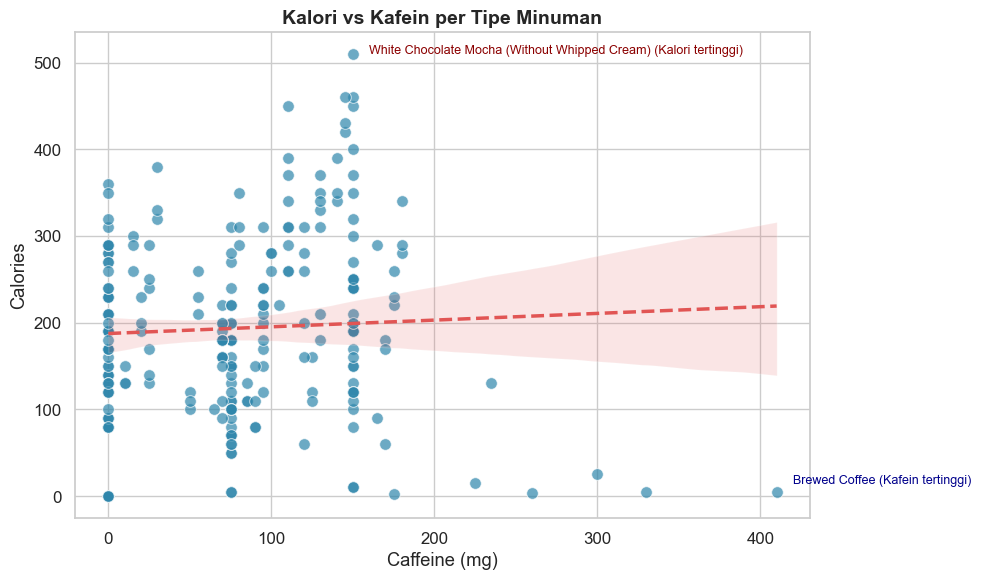

In [44]:
# Pastikan kolom numerik
df_vis['Calories'] = pd.to_numeric(df_vis['Calories'], errors='coerce')
df_vis['Caffeine_mg'] = pd.to_numeric(df_vis['Caffeine_mg'], errors='coerce')

# Hilangkan data kosong
df_vis = df_vis.dropna(subset=['Calories', 'Caffeine_mg'])

# Cari titik ekstrem
max_cal = df_vis.loc[df_vis['Calories'].idxmax()]
max_caf = df_vis.loc[df_vis['Caffeine_mg'].idxmax()]

# Plot
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df_vis,
    x='Caffeine_mg',
    y='Calories',
    alpha=0.7,
    color='#2E86AB',
    s=70
)

sns.regplot(
    data=df_vis,
    x='Caffeine_mg',
    y='Calories',
    scatter=False,
    line_kws={'color': '#E15554', 'linewidth': 2.5, 'linestyle': '--'},
    ci=95
)

# Tambahkan anotasi
plt.text(
    max_cal['Caffeine_mg'] + 10,
    max_cal['Calories'],
    f"{max_cal['Beverage']} (Kalori tertinggi)",
    fontsize=9,
    color='darkred'
)

plt.text(
    max_caf['Caffeine_mg'] + 10,
    max_caf['Calories'] + 10,
    f"{max_caf['Beverage']} (Kafein tertinggi)",
    fontsize=9,
    color='darkblue'
)

plt.title('Kalori vs Kafein per Tipe Minuman', fontsize=14, weight='bold')
plt.xlabel('Caffeine (mg)')
plt.ylabel('Calories')
plt.tight_layout()
plt.show()

Insight Analysis
===

1. Garis merah sedikit miring ke atas, artinya ada korelasi positif lemah antara Caffeine dan Calories.Semakin tinggi kafein, cenderung sedikit naik juga kalorinya — tapi tidak kuat hubungannya.

2. Titik-titiknya menyebar cukup luas (tidak berbaris rapat di sepanjang garis merah), artinya banyak minuman yang kalorinya tinggi tapi kafeinnya rendah, dan sebaliknya.

3. Tidak ada hubungan kuat antara kadar kafein dan jumlah kalori pada minuman Starbucks.

4. Banyak minuman tinggi kalori yang justru rendah kafein (seperti Frappuccino),sedangkan minuman dengan kafein tinggi (seperti Brewed Coffee) biasanya justru rendah kalori